<a href="https://colab.research.google.com/github/moritzlarsen/nlp_disastertweets/blob/master/Real_or_not_Real_Self_padded.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Text cleaning


In [ ]:
#Imports
from google.colab import files
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import pandas as pd
import io
import re
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
uploaded_train = files.upload()

Saving train.csv to train.csv


In [ ]:
df_train = pd.read_csv(io.StringIO(uploaded_train['train.csv'].decode('utf-8')), sep = ',')
print("Shape of data->", df_train.shape)

Shape of data-> (7613, 5)


In [ ]:
uploaded_test = files.upload()

Saving test.csv to test.csv


In [ ]:
df_test = pd.read_csv(io.StringIO(uploaded_test['test.csv'].decode('utf-8')), sep = ',')
print("Shape of data->", df_test.shape)

Shape of data-> (3263, 4)


In [ ]:
# Defining the text cleaning function

#load stopwords from the nltk for stopword removal
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def clean(tweet):
  # Expand Contractions 
  tweet = re.sub(r"he's", "he is", tweet)
  tweet = re.sub(r"there's", "there is", tweet)
  tweet = re.sub(r"We're", "We are", tweet)
  tweet = re.sub(r"That's", "That is", tweet)
  tweet = re.sub(r"won't", "will not", tweet)
  tweet = re.sub(r"they're", "they are", tweet)
  tweet = re.sub(r"Can't", "Cannot", tweet)
  tweet = re.sub(r"wasn't", "was not", tweet)
  tweet = re.sub(r"don\x89Ûªt", "do not", tweet)
  tweet = re.sub(r"aren't", "are not", tweet)
  tweet = re.sub(r"isn't", "is not", tweet)
  tweet = re.sub(r"What's", "What is", tweet)
  tweet = re.sub(r"haven't", "have not", tweet)
  tweet = re.sub(r"hasn't", "has not", tweet)
  tweet = re.sub(r"There's", "There is", tweet)
  tweet = re.sub(r"He's", "He is", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"You're", "You are", tweet)
  tweet = re.sub(r"I'M", "I am", tweet)
  tweet = re.sub(r"shouldn't", "should not", tweet)
  tweet = re.sub(r"wouldn't", "would not", tweet)
  tweet = re.sub(r"i'm", "I am", tweet)
  tweet = re.sub(r"I\x89Ûªm", "I am", tweet)
  tweet = re.sub(r"I'm", "I am", tweet)
  tweet = re.sub(r"Isn't", "is not", tweet)
  tweet = re.sub(r"Here's", "Here is", tweet)
  tweet = re.sub(r"you've", "you have", tweet)
  tweet = re.sub(r"you\x89Ûªve", "you have", tweet)
  tweet = re.sub(r"we're", "we are", tweet)
  tweet = re.sub(r"what's", "what is", tweet)
  tweet = re.sub(r"couldn't", "could not", tweet)
  tweet = re.sub(r"we've", "we have", tweet)
  tweet = re.sub(r"it\x89Ûªs", "it is", tweet)
  tweet = re.sub(r"doesn\x89Ûªt", "does not", tweet)
  tweet = re.sub(r"It\x89Ûªs", "It is", tweet)
  tweet = re.sub(r"Here\x89Ûªs", "Here is", tweet)
  tweet = re.sub(r"who's", "who is", tweet)
  tweet = re.sub(r"I\x89Ûªve", "I have", tweet)
  tweet = re.sub(r"y'all", "you all", tweet)
  tweet = re.sub(r"can\x89Ûªt", "cannot", tweet)
  tweet = re.sub(r"would've", "would have", tweet)
  tweet = re.sub(r"it'll", "it will", tweet)
  tweet = re.sub(r"we'll", "we will", tweet)
  tweet = re.sub(r"wouldn\x89Ûªt", "would not", tweet)
  tweet = re.sub(r"We've", "We have", tweet)
  tweet = re.sub(r"he'll", "he will", tweet)
  tweet = re.sub(r"Y'all", "You all", tweet)
  tweet = re.sub(r"Weren't", "Were not", tweet)
  tweet = re.sub(r"Didn't", "Did not", tweet)
  tweet = re.sub(r"they'll", "they will", tweet)
  tweet = re.sub(r"they'd", "they would", tweet)
  tweet = re.sub(r"DON'T", "DO NOT", tweet)
  tweet = re.sub(r"That\x89Ûªs", "That is", tweet)
  tweet = re.sub(r"they've", "they have", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"should've", "should have", tweet)
  tweet = re.sub(r"You\x89Ûªre", "You are", tweet)
  tweet = re.sub(r"where's", "where is", tweet)
  tweet = re.sub(r"Don\x89Ûªt", "Do not", tweet)
  tweet = re.sub(r"we'd", "we would", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"weren't", "were not", tweet)
  tweet = re.sub(r"They're", "They are", tweet)
  tweet = re.sub(r"Can\x89Ûªt", "Cannot", tweet)
  tweet = re.sub(r"you\x89Ûªll", "you will", tweet)
  tweet = re.sub(r"I\x89Ûªd", "I would", tweet)
  tweet = re.sub(r"let's", "let us", tweet)
  tweet = re.sub(r"it's", "it is", tweet)
  tweet = re.sub(r"can't", "cannot", tweet)
  tweet = re.sub(r"don't", "do not", tweet)
  tweet = re.sub(r"you're", "you are", tweet)
  tweet = re.sub(r"i've", "I have", tweet)
  tweet = re.sub(r"that's", "that is", tweet)
  tweet = re.sub(r"i'll", "I will", tweet)
  tweet = re.sub(r"doesn't", "does not", tweet)
  tweet = re.sub(r"i'd", "I would", tweet)
  tweet = re.sub(r"didn't", "did not", tweet)
  tweet = re.sub(r"ain't", "am not", tweet)
  tweet = re.sub(r"you'll", "you will", tweet)
  tweet = re.sub(r"I've", "I have", tweet)
  tweet = re.sub(r"Don't", "do not", tweet)
  tweet = re.sub(r"I'll", "I will", tweet)
  tweet = re.sub(r"I'd", "I would", tweet)
  tweet = re.sub(r"Let's", "Let us", tweet)
  tweet = re.sub(r"you'd", "You would", tweet)
  tweet = re.sub(r"It's", "It is", tweet)
  tweet = re.sub(r"Ain't", "am not", tweet)
  tweet = re.sub(r"Haven't", "Have not", tweet)
  tweet = re.sub(r"Could've", "Could have", tweet)
  tweet = re.sub(r"youve", "you have", tweet)  
  tweet = re.sub(r"donå«t", "do not", tweet)
  
  # Character entity references
  tweet = re.sub(r"&gt;", ">", tweet)
  tweet = re.sub(r"&lt;", "<", tweet)
  tweet = re.sub(r"&amp;", "&", tweet)
  
  #Lowercase
  tweet = tweet.lower()

  #Remove URLS
  tweet = re.sub(r"https?:\/\/t.co\/[A-Za-z0-9]+", "", tweet)

  # Remove punctuation
  tweet = re.sub('[%s]' % re.escape(string.punctuation), ' ', tweet)

  #Remove digits
  tweet = re.sub('\w*\d\w*','', tweet)

  # Tokenize
  tweet = word_tokenize(tweet)
  
  #Remove stopwords
  tweet = [word for word in tweet if word not in stopwords]

  #join back to string
  separator = ','
  tweet = separator.join(tweet)
  tweet = tweet.replace(",", " ")

  return tweet

In [ ]:
# Apply function to the training tweets and check first columns
df_train['text_cleaned'] = df_train['text'].apply(lambda x: clean(x))
df_train.head(30)

,id,keyword,location,text,target,text_cleaned
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deeds reason earthquake may allah forgive us
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,residents asked shelter place notified officer...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfires evacuation orders cal...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfires pou...
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,rockyfire update california hwy closed directi...
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,flood disaster heavy rain causes flash floodin...
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,top hill see fire woods
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,emergency evacuation happening building across...
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,afraid tornado coming area


In [ ]:
#reduce data to two columns: tweet and label

df_train_clean = df_train.drop(df_train.columns[[0, 1, 2, 3]], axis=1)
df_train_dirty = df_train.drop(df_train.columns[[0, 1, 2, 5]], axis=1)
df_train_clean.head(5)
#df_train_dirty.head(5)

,target,text_cleaned
0,1,deeds reason earthquake may allah forgive us
1,1,forest fire near la ronge sask canada
2,1,residents asked shelter place notified officer...
3,1,people receive wildfires evacuation orders cal...
4,1,got sent photo ruby alaska smoke wildfires pou...


Tensor flow start

from this tutorial:
https://stackabuse.com/text-classification-with-bert-tokenizer-and-tf-2-0-in-python/

In [ ]:
#install bert
!pip install bert-for-tf2
#install unknown package???
!pip install sentencepiece

     |████████████████████████████████| 40kB 3.0MB/s 
  Created wheel for bert-for-tf2: filename=bert_for_tf2-0.14.4-cp36-none-any.whl size=30114 sha256=04a1da3c5b8cab562c4f981d7b9bbb406cfdeb34ca195315c1ea7f4e9a08beb8
  Stored in directory: /root/.cache/pip/wheels/cf/3f/4d/79d7735015a5f523648df90d871ce8e89a7df8185f7703eeab
  Created wheel for py-params: filename=py_params-0.9.7-cp36-none-any.whl size=7302 sha256=c9d564bea7ad7071085d6541160e59821a62a513fe9eb66c375998b25f137f4e
  Stored in directory: /root/.cache/pip/wheels/67/f5/19/b461849a50aefdf4bab47c4756596e82ee2118b8278e5a1980
  Created wheel for params-flow: filename=params_flow-0.8.2-cp36-none-any.whl size=19473 sha256=225995f2fea903e21c8fa33484273c9b9dfdbbbcea2fcb1ec658ef5925a49b98
  Stored in directory: /root/.cache/pip/wheels/08/c8/7f/81c86b9ff2b86e2c477e3914175be03e679e596067dc630c06
Successfully built bert-for-tf2 py-params params-flow
     |████████████████████████████████| 1.1MB 7.8MB/s 


In [ ]:
#make sure to run on tf version 2.0
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

#include tf_hub
import tensorflow_hub as hub

#import layers and BERT (from hub)
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import bert

In [ ]:
#check dataset columns
print(df_train_clean.columns.values)
print(df_train_clean.target.unique())

#separate labels from tweets
tweets = df_train_clean.text_cleaned
labels = df_train_clean.target

#check on random entry
print(tweets[10])
print(labels[10])

['target' 'text_cleaned']
[1 0]
three people died heat wave far
1


Test if data cleaned with R works better. It didn't. Just skip the next two cells.

In [ ]:
#test with R data
uploaded_clean = files.upload()
df_cleaned = pd.read_csv(io.StringIO(uploaded_clean['text_targetR.csv'].decode('utf-8')), sep = ',')

Saving text_targetR.csv to text_targetR (2).csv


In [ ]:
#separate labels from tweets
tweets = df_cleaned.text
labels = df_cleaned.target

#check on random entry
print(tweets[10])
print(labels[10])

three people died from the heat wave so far
1


# **Tokenization**

Using 30,000 token vocabulary from bert
--> WordPiece embeddings

In [ ]:
#load BERT tokenizer class
BertTokenizer = bert.bert_tokenization.FullTokenizer
#create BERT embedding layer (won't be trained as set to FALSE)
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1",
                            trainable=False)
#create BERT vocabulary as numpy array
vocabulary_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
#set all to lower case
to_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
#pass vocab and lower case variable to tokenizer object
tokenizer = BertTokenizer(vocabulary_file, to_lower_case)

In [ ]:
#test tokenizer
print(tokenizer.tokenize("Look! A vulcanic erruption."))
tokenizer.convert_tokens_to_ids(tokenizer.tokenize("Look! A vulcanic erruption."))

['look', '!', 'a', 'vulcan', '##ic', 'er', '##rup', '##tion', '.']


[2298, 999, 1037, 25993, 2594, 9413, 21531, 3508, 1012]

In [ ]:
#define function to automatically tokenize tweets
def tokenize_tweets(text_tweets):
    return tokenizer.convert_tokens_to_ids(tokenizer.tokenize(text_tweets))

#tokenize all tweets
tokenized_tweets = [tokenize_tweets(tweet) for tweet in tweets ]

tokenized_tweets[10]

[2093, 2111, 2351, 3684, 4400, 2521]

# Preparing Data

In [ ]:
#install package for randomly splitting into train and validation sets
!pip install sklearn
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences

tweets_train, tweets_validation, labels_train, labels_validation = train_test_split(tokenized_tweets, labels,test_size=0.2)

#eventually check how the ses look like?

max_length = 128
trunc_type = 'post'
padding_type = 'post'

#coursera try padding
training_padded = pad_sequences(tweets_train,maxlen=max_length, padding = padding_type, truncating = trunc_type) 
testing_padded = pad_sequences(tweets_validation,maxlen=max_length, padding = padding_type, truncating = trunc_type) 


# The model


In [ ]:
# define hyper parameters
VOCAB_LENGTH = len(tokenizer.vocab)
print(VOCAB_LENGTH)
EMB_DIM = 16 #200 #embedding dimension
#CNN_FILTERS =  10 #100 #number of filter neurons
#DNN_UNITS = 8 #256 #number of dense neurons
#OUTPUT_CLASSES = 2 #---> sets dense unit to 1

#DROPOUT_RATE = 0.3

#NB_EPOCHS = 20 #5 #number of epochs

30522


In [ ]:
import matplotlib.pyplot as plt
import numpy as np


#coursera model with self padded
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(VOCAB_LENGTH, EMB_DIM, input_length=max_length),
    #tf.keras.layers.Flatten(),
    #tf.keras.layers.Bidirectional(tf.keras.layers.GRU(32)),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8)),
    #tf.keras.layers.Conv1D(64, 5, activation='relu'),
    #tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()


Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_29 (Embedding)     (None, 128, 16)           488352    
_________________________________________________________________
global_average_pooling1d_24  (None, 16)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_29 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 25        
Total params: 488,785
Trainable params: 488,785
Non-trainable params: 0
_________________________________________________________________


Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_25 (Embedding)     (None, 128, 16)           488352    
_________________________________________________________________
global_average_pooling1d_20  (None, 16)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 24)                408       
_________________________________________________________________
dropout_25 (Dropout)         (None, 24)                0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 25        
Total params: 488,785
Trainable params: 488,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
191/191 [==============================] - 2s 8ms/step - loss: 0.6929 - accuracy: 0.5233 - val_loss: 0

(0.0001, 0.005, 0.0, 1.0)

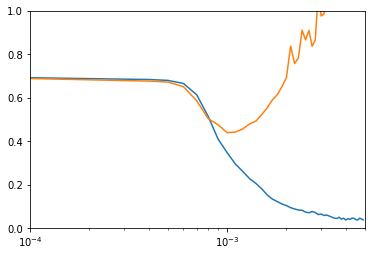

In [ ]:
#finding out the best learning rate
def scheduler(epoch):
  if epoch == 1:
    return 0.0001
  else:
    return 0.0001 * epoch

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

opt = tf.keras.optimizers.Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

history = model.fit(training_padded, labels_train, epochs=50, validation_data=(testing_padded, labels_validation), callbacks=[lr_schedule])
lrs = 0.0001 * np.arange(50)
plt.semilogx(lrs, history.history['loss'])
plt.semilogx(lrs, history.history['val_loss'])
plt.axis([0.0001,0.005,0,1])

Epoch 1/20
191/191 - 1s - loss: 0.6854 - accuracy: 0.5627 - val_loss: 0.6764 - val_accuracy: 0.5890
Epoch 2/20
191/191 - 1s - loss: 0.6800 - accuracy: 0.5662 - val_loss: 0.6686 - val_accuracy: 0.5890
Epoch 3/20
191/191 - 1s - loss: 0.6589 - accuracy: 0.5956 - val_loss: 0.6397 - val_accuracy: 0.6520
Epoch 4/20
191/191 - 1s - loss: 0.6059 - accuracy: 0.7222 - val_loss: 0.5849 - val_accuracy: 0.7965
Epoch 5/20
191/191 - 1s - loss: 0.5270 - accuracy: 0.7901 - val_loss: 0.5176 - val_accuracy: 0.8011
Epoch 6/20
191/191 - 1s - loss: 0.4480 - accuracy: 0.8279 - val_loss: 0.4764 - val_accuracy: 0.8063
Epoch 7/20
191/191 - 1s - loss: 0.3970 - accuracy: 0.8507 - val_loss: 0.4552 - val_accuracy: 0.8083
Epoch 8/20
191/191 - 1s - loss: 0.3525 - accuracy: 0.8675 - val_loss: 0.4491 - val_accuracy: 0.8116
Epoch 9/20
191/191 - 1s - loss: 0.3224 - accuracy: 0.8829 - val_loss: 0.4526 - val_accuracy: 0.8063
Epoch 10/20
191/191 - 1s - loss: 0.2895 - accuracy: 0.8982 - val_loss: 0.4496 - val_accuracy: 0.8096

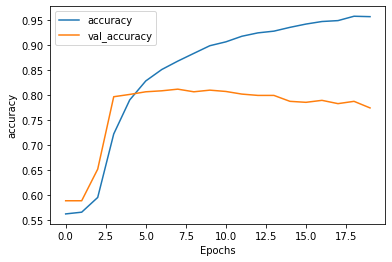

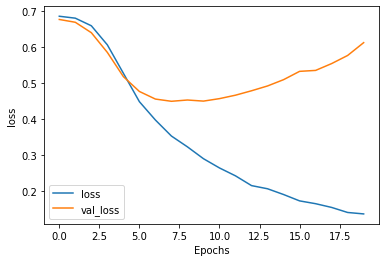

In [ ]:
#train coursera model with self padded
historyP= model.fit(training_padded, labels_train, epochs=NB_EPOCHS, validation_data=(testing_padded, labels_validation), verbose=2)

#evaluate cousera model


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(historyP, "accuracy")
plot_graphs(historyP, "loss")